   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

C:\Users\HP\AppData\Local\Temp\ipykernel_14408\2217563548.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0]).astype(int)


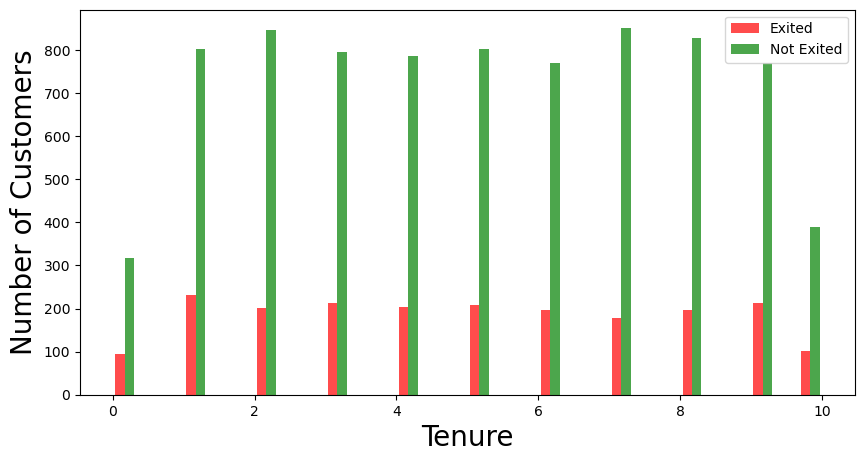

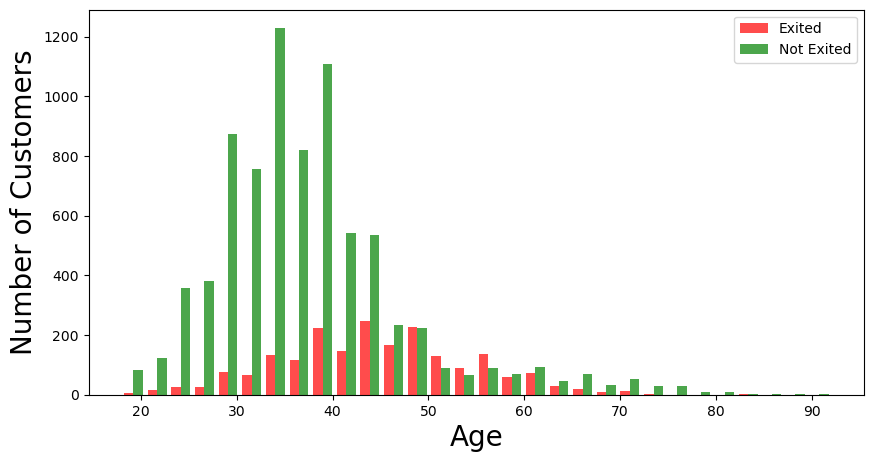

In [12]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

# Load dataset
df = pd.read_csv('E:/Coding/ML/Churn_Modelling.csv')
print(df.head())
print(df.shape)

# Drop unnecessary columns
df.drop(['RowNumber', 'Surname', 'CustomerId'], axis='columns', inplace=True)

# Check for missing values
print(df.isna().sum())

# Check data types
print(df.dtypes)

# Inspect unique values
print(df['Geography'].unique())
print(df['Gender'].unique())

# Replace 'Gender' values with numerical encoding
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0]).astype(int)

# One-hot encoding for 'Geography'
df = pd.get_dummies(data=df, columns=['Geography'], drop_first=True)
print(df.dtypes)

# Check target variable distribution
print(df['Exited'].value_counts())

# Visualization function
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label=['Exited', 'Not Exited'], bins=30, alpha=0.7)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel("Number of Customers", fontsize=20)
    plt.legend()
    plt.show()

# Visualize 'Tenure'
df_exited = df[df['Exited'] == 1]['Tenure']
df_not_exited = df[df['Exited'] == 0]['Tenure']
visualization(df_exited, df_not_exited, "Tenure")

# Visualize 'Age'
df_exited_age = df[df['Exited'] == 1]['Age']
df_not_exited_age = df[df['Exited'] == 0]['Age']
visualization(df_exited_age, df_not_exited_age, "Age")

# Define columns to scale
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Separate features and target
X = df.drop(['Exited'], axis=1)
y = df['Exited']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
X_train = scaler_standard.fit_transform(X_train)
X_test = scaler_standard.transform(X_test)

# # TensorFlow and Keras for modeling
# import tensorflow as tf
# from tensorflow import keras

# (Continue with model building...)
